In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../dataset/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 33)

In [4]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [5]:
x = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
le.transform(['M', 'B'])

array([1, 0])

In [7]:
x_train1, x_test, y_train1, y_test = train_test_split(x, y, test_size=.20, random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_train1, y_train1, test_size=.20, random_state=1)

In [8]:
print('Total dataset ', len(x))
print('Train dataset ', len(x_train))
print('Test dataset ', len(x_test))
print('Validation dataset ', len(x_val))

Total dataset  569
Train dataset  364
Test dataset  114
Validation dataset  91


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)), ('svc', SVC())])
pipe_lr.fit(x_train, y_train)

Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA(n_components=2)),
                ('svc', SVC())])

In [10]:
pipe_lr.score(x_test, y_test)

0.9385964912280702

In [11]:
from sklearn.model_selection import GridSearchCV

pipe_svc = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('svc', SVC())])

param_grid = {
    'pca__n_components': list(range(1, 34)),
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'svc__gamma': ['scale', 'auto']
}

grid = GridSearchCV(pipe_svc, param_grid=param_grid, cv=20)
grid.fit(x_train, y_train)

C:\Users\user\anaconda3\envs\ds\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10800 fits failed out of a total of 39600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\envs\ds\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\envs\ds\lib\site-packages\sklearn\pipeline.py", line 406, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\user\anaconda3\envs\ds\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    raise ValueError(
ValueError: 

GridSearchCV(cv=20,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('pca', PCA()), ('svc', SVC())]),
             param_grid={'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19, 20, 21, 22, 23, 24, 25, 26,
                                               27, 28, 29, 30, ...],
                         'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid',
                                         'precomputed']})

In [12]:
print('Best cross-validation-score: {:.2f}'.format(grid.best_score_))
print('Best Parameters: ', grid.best_params_)
print('Validation set accuracy: {:.2f}'.format(grid.score(x_val, y_val)))

Best cross-validation-score: 0.98
Best Parameters:  {'pca__n_components': 14, 'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Validation set accuracy: 0.97


In [15]:
pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=14)), ('svc', SVC(C=0.1, gamma='scale', kernel='linear', probability=True))])
pipe_lr.fit(x_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(x_test, y_test))

Test Accuracy: 0.956


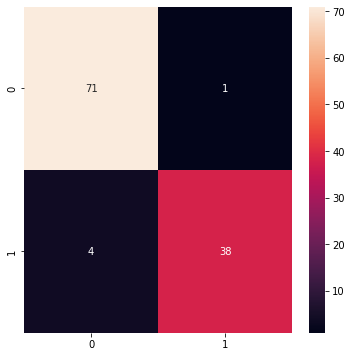

In [16]:
from sklearn import metrics

y_pred = pipe_lr.predict(x_test)

cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True)
plt.show()

In [17]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



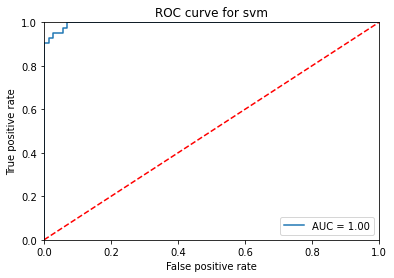

In [18]:
y_score = pipe_lr.predict_proba(x_test)

fpr, tpr, threshold = metrics.roc_curve(y_test, y_score[:, 1])
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('ROC curve for svm')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()